In [4]:
%cd ..

e:\Github\plant_disease_detection


# Importing Libraries

In [42]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# Extracting the path for each image

In [18]:
directory = r'dataset\datasets\vipoooool\new-plant-diseases-dataset\versions\2\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'

classes = os.listdir(directory)

imgs_path = []

imgs_classes = []

for clas in classes:

    full_path = directory + '\\' + clas

    images = os.listdir(full_path)

    images_path = [full_path + '\\' + image for image in images]

    images_class = [clas for img_path in images_path]

    imgs_path.extend(images_path)
    imgs_classes.extend(images_class)


In [24]:
df = pd.DataFrame({'image_path': imgs_path, 'class': imgs_classes})
df

,image_path,class
0,dataset\datasets\vipoooool\new-plant-diseases-...,Apple___Apple_scab
1,dataset\datasets\vipoooool\new-plant-diseases-...,Apple___Apple_scab
2,dataset\datasets\vipoooool\new-plant-diseases-...,Apple___Apple_scab
3,dataset\datasets\vipoooool\new-plant-diseases-...,Apple___Apple_scab
4,dataset\datasets\vipoooool\new-plant-diseases-...,Apple___Apple_scab
...,...,...
70290,dataset\datasets\vipoooool\new-plant-diseases-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
70291,dataset\datasets\vipoooool\new-plant-diseases-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
70292,dataset\datasets\vipoooool\new-plant-diseases-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus
70293,dataset\datasets\vipoooool\new-plant-diseases-...,Tomato___Tomato_Yellow_Leaf_Curl_Virus


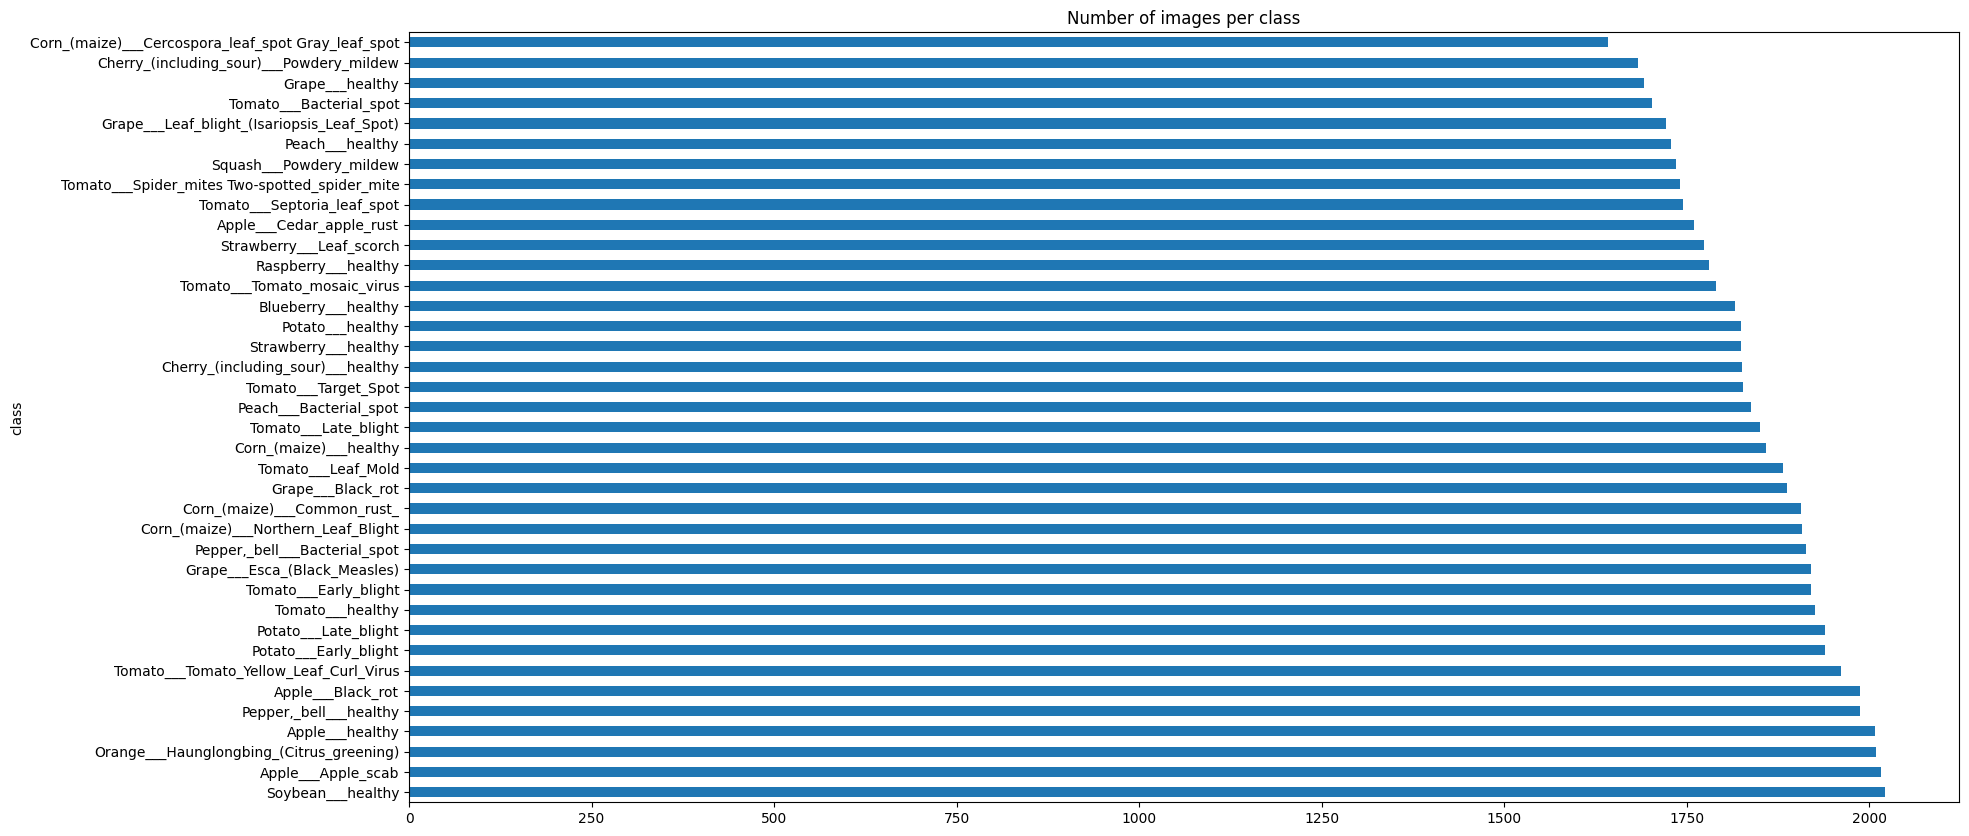

In [38]:
df['class'].value_counts().plot(kind='barh', figsize=(20, 10), title='Number of images per class')
plt.show()

In [27]:
df.sample(5)

,image_path,class
6160,dataset\datasets\vipoooool\new-plant-diseases-...,Apple___healthy
25001,dataset\datasets\vipoooool\new-plant-diseases-...,Grape___healthy
28007,dataset\datasets\vipoooool\new-plant-diseases-...,Orange___Haunglongbing_(Citrus_greening)
13957,dataset\datasets\vipoooool\new-plant-diseases-...,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_...
51019,dataset\datasets\vipoooool\new-plant-diseases-...,Strawberry___Leaf_scorch


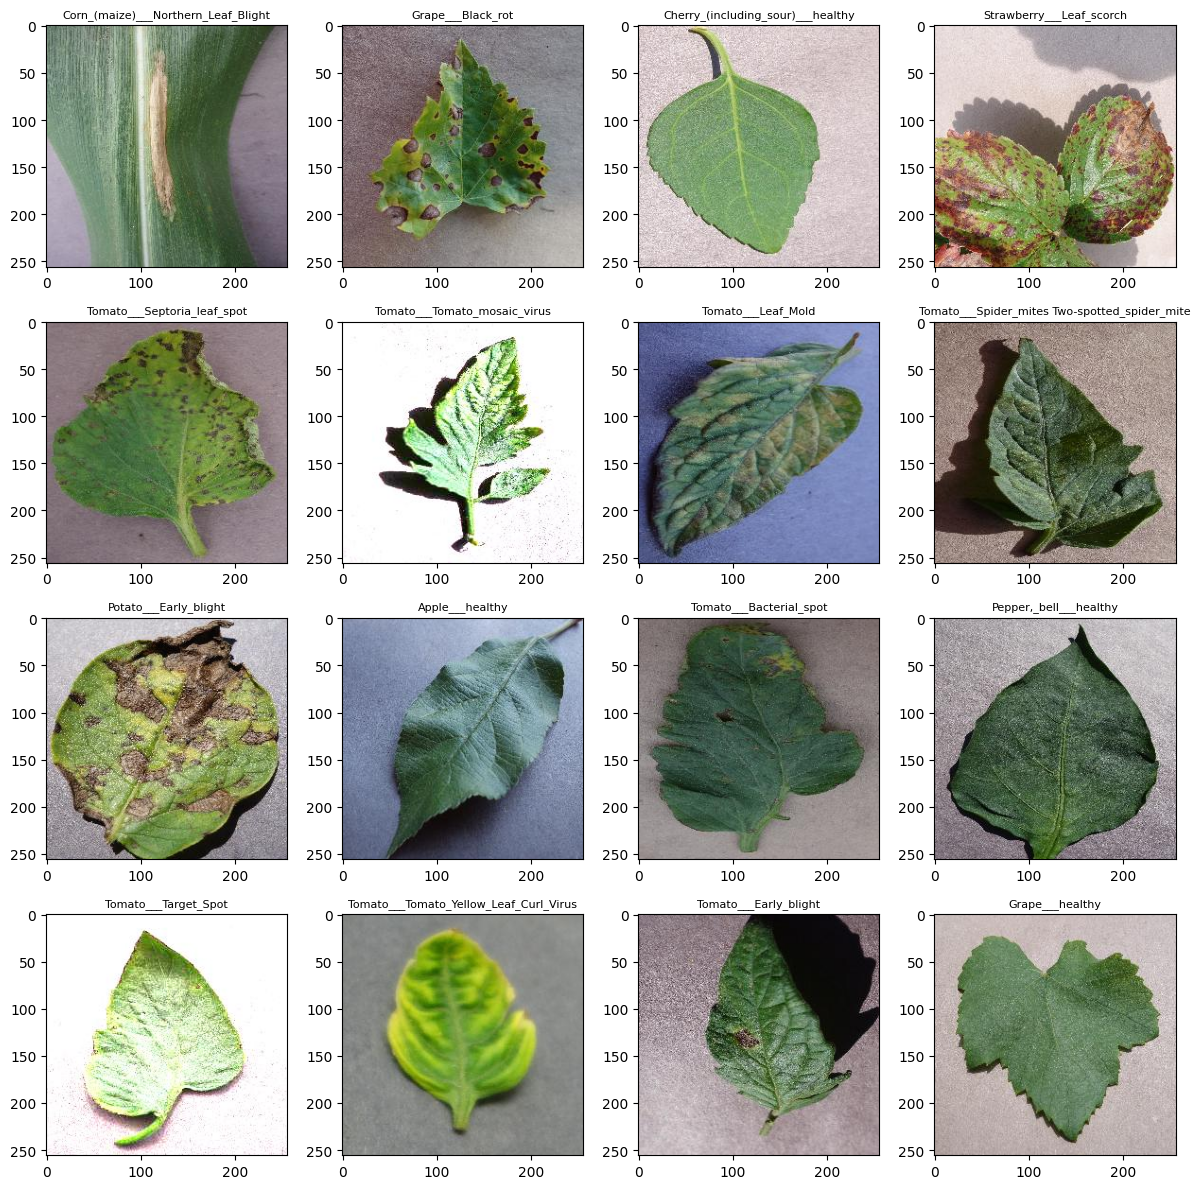

In [49]:
plt.figure(figsize=(12, 12))

sample_df = df.sample(16, random_state=42)

for i in range(16):
    img_path = sample_df.iloc[i]['image_path']
    label = sample_df.iloc[i]['class']

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=8)

plt.tight_layout()
plt.show()

In [50]:
df.to_csv('data_warehouse.csv', index=False)